In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [4]:
park_lines = gpd.read_file('../data/ParkB.geojson')
print(park_lines.crs)
park_lines.head( )

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [5]:
type(park_lines)

geopandas.geodataframe.GeoDataFrame

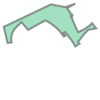

In [6]:
park_lines.loc[0, 'geometry']

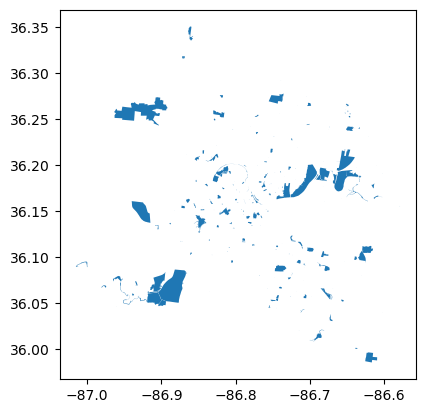

In [7]:
park_lines.plot();

In [9]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
parks_by_zip = gpd.sjoin(park_lines, zipcodes, op = 'within')

D:\anaconda3\envs\geospatial\lib\site-packages\geopandas\sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


In [11]:
parks_by_zip['zip'].value_counts()

37221    21
37214    19
37208    18
37228    17
37013    16
37211    16
37209    15
37201    13
37206    13
37203    12
37218    12
37138    11
37207    10
37076     9
37205     8
37115     7
37217     6
37210     6
37215     5
37216     4
37204     3
37212     3
37189     3
37220     2
37027     2
37080     2
37219     2
37213     1
37072     1
Name: zip, dtype: int64

In [14]:
parks_in_37221 = parks_by_zip.loc[parks_by_zip['zip'] == '37221']
parks_in_37221.shape

(21, 16)

In [20]:
polygon37221 = zipcodes.loc[zipcodes['zip'] == '37221']
polygon37221.shape

(1, 6)

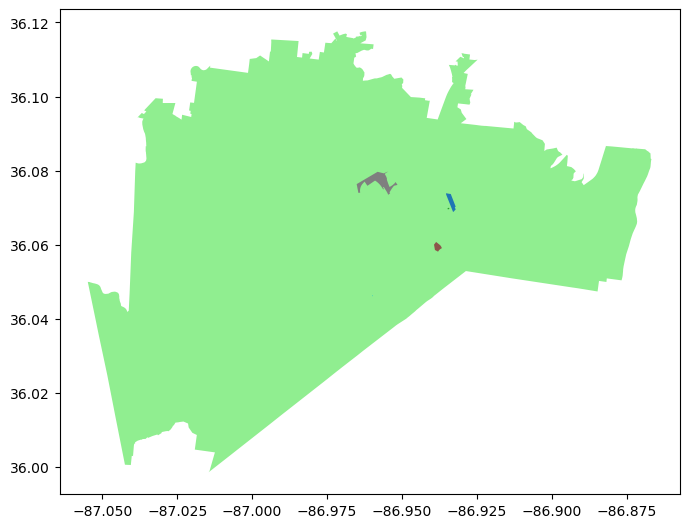

In [21]:
#fig, ax = matplotlib.subplots()
ax = polygon37221.plot(figsize = (8, 10), color = 'lightgreen')
parks_in_37221.plot( ax = ax, column = 'name');
plt.show();

In [22]:
polygon37221.geometry.centroid

C:\Users\cside\AppData\Local\Temp\ipykernel_17412\2297672768.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37221.geometry.centroid


7    POINT (-86.97531 36.06283)
dtype: geometry

In [26]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37221.geometry.centroid[7]
print(center)

POINT (-86.97531387608755 36.06283153351842)


C:\Users\cside\AppData\Local\Temp\ipykernel_17412\2138661059.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37221.geometry.centroid[7]
